<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics<br />
    Sample test </center></h2>
    


## Question 1

You are now given a dataset, containing a three dimensional time series. The coordinates are given as `x`,`y` and `z`. The series has `10000` time steps. 

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
df=pd.read_csv('Q1.csv')
data=np.array(df.iloc[0:100000:10,1:]).T  
# 10000 time steps. We try to make use of the whole data set so we set the step to be 10.
# actually transpose is not necessary because putting it back to x_train, ... will transpose again. 

# plot: 
fig=px.line_3d(x=data[0],y=data[1],z=data[2])
fig.show()

We now would like to do regression of the trajectory in the following form:

Suppose ${\bf D}= [d_0,d_1,\cdots,d_{9999}]$ is the time series, where $d_t = [x_t,y_t,z_t]^T$ denotes the coordinates at time $t$. We want to use a neural network $\Phi_{NN}:\mathbb{R}^3 \rightarrow \mathbb{R}^3$ such that 
$$\Phi_{NN}([x_t,y_t,z_t]^T)=[x_{t+1},y_{t+1},z_{t+1}]^T,$$
to predict the coordinate of the next step.

We have the following requirement:
- Training-Validating-Testing:

1. Use the first 8000 steps as the training data. (i.e. the training input-output pairs are $[(d_0,d_1),(d_1,d_2),\cdots,(d_{7999},d_{8000})]$). 
2. Use `0.2` for `validation_split`. 

3. Use the remaining steps as the testing data.

4. Training Epoch should be not greater than `1000` and batchsize=`200`.

- Performance:

1. Attain an MSE (on the testing data) less than `0.01`.

The MSE should be computed by this:

Denote your prediction by $P=[p_{8000},p_{8001},\cdots,p_{9999}]$.
The MSE is defined by 
$$\frac{1}{2000}\sum_{k=8000}^{9999}(p_k-d_k)^2$$



2. Save your model as a `h5` file (named `q1a.h5`) and submit it with the jupyter notebook.


In [2]:
## answer of 1a
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

X_train=data[:,:8000].T
y_train=data[:,1:8001].T
X_test=data[:,8000:-1].T
y_test=data[:,8001:].T


n_features = X_train.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(3))

model.compile(optimizer='adam', loss='mse')

# fitting the model, and also saving the data into `history` object. 
history = model.fit(X_train, y_train, epochs=300, batch_size=200, verbose=1, validation_split=0.2,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
model.save('q1a.h5')

Epoch 1/300
32/32 [==============================] - 1s 5ms/step - loss: 149.7703 - val_loss: 6.3699
Epoch 2/300
32/32 [==============================] - 0s 3ms/step - loss: 4.8725 - val_loss: 1.5178
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 1.1176 - val_loss: 0.7588
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.6368 - val_loss: 0.5316
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4719 - val_loss: 0.4179
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.3798 - val_loss: 0.3460
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.3146 - val_loss: 0.2759
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 0.2633 - val_loss: 0.2329
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 0.2246 - val_loss: 0.1999
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1962 - val_loss: 0.1802
Epoch 1

c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



Plot the training loss and validation loss (MSE).

MSE: 0.006, RMSE: 0.078


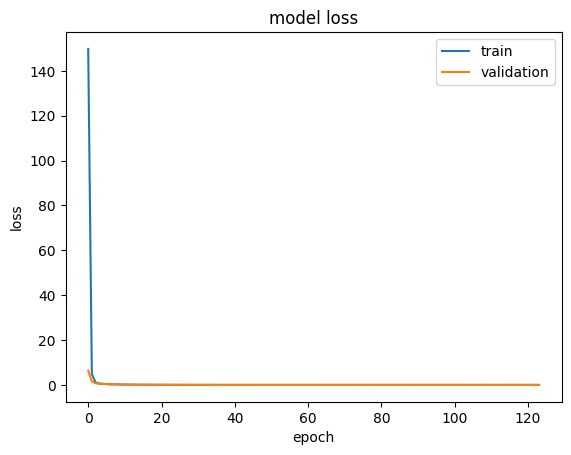

In [3]:
## answer of 1b

error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, np.sqrt(error)))

# plot: 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


But in reality, if we want to do long-term predictions (next few steps instead just one step), we need to use our previous predictions for the future ones. 

Now, train a neural network under the same requirement above to predict the trajectory for the next 100 steps ($t=8001,\cdots,8100$) using the same training set, so that the MSE is less than `100`.

In other words, for $t\geq 8001$ (testing phase), your prediction should base on your previous prediction, instead of the testing data.

i.e. $$p_{t+1}=\Phi_{NN}(p_{t})$$
but NOT
$$p_{t+1}=\Phi_{NN}(d_{t})$$

Predict the trajectory for $t=8001,\cdots,8100$ and calculate the mean squared error.

Save your model as `q1b.h5` and submit it with the jupyter notebook.

In [4]:
## answer of 1c
from tensorflow.keras.layers import Dropout

# it is basically the same neural network model
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')


""" 
Model in q1a:

n_features = X_train.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(3))

"""

history = model.fit(X_train, y_train, epochs=500, batch_size=200, verbose=1, validation_split=0.2)
model.save('q1b.h5')

Epoch 1/500
32/32 [==============================] - 0s 4ms/step - loss: 147.4450 - val_loss: 14.3850
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 4.1187 - val_loss: 1.0701
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.9311 - val_loss: 0.5706
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5114 - val_loss: 0.3572
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.3573 - val_loss: 0.2752
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2814 - val_loss: 0.2317
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2362 - val_loss: 0.1968
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2027 - val_loss: 0.1772
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1780 - val_loss: 0.1558
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1385
Epoch 

## Here, we load the trained model to save time. It could be costly if we would click `run_all` again somehow

In [4]:
from tensorflow.keras.models import load_model
import plotly.graph_objects as go
import numpy as np

model = load_model('q1b.h5')
in_tmp = data[:, 8000].T # the 8000th step coordinate. 
print(in_tmp.shape) # (3,1)

pred = np.zeros((3, 100)) # creating a numpy array that is going to store the future 100 predictions. 

asdas = in_tmp.reshape(1, -1)
print(f"shape of sasda{asdas.shape}")

# predict 100 times.
# initial in_tmp was specified, but then after the first run, `in_tmp` will be the prediction of the previous step.
for t, _ in enumerate(range(8000, 8100)): # range(8000, 8100) return the 8001-8100 steps
    in_tmp = model.predict(in_tmp.reshape(1, -1), verbose=0)
    pred[:, t] = in_tmp

# plot
plot_fig = go.Figure(data=go.Scatter3d(
    x=pred[0], y=pred[1], z=pred[2], mode='lines',
    line=dict(color='blue')
))

actual_traj = data[:, 8001:8101]
plot_fig.add_trace(go.Scatter3d(
    x=actual_traj[0], y=actual_traj[1], z=actual_traj[2], mode='lines',
    line=dict(color='red')
))

print(f'MSE: {((pred[:,:100] - actual_traj) ** 2).mean()}')
plot_fig.show()


(3,)
shape of sasda(1, 3)
MSE: 31.44781413147728
